In [1]:
import numpy as np
import torch

from datasets.pointodyssey import PointOdysseyDUSt3R
from datasets.tartanair import TarTanAirDUSt3R

In [2]:
import mediapy as media
import matplotlib.pyplot as plt
import rerun as rr
import numpy as np
import torch
import random

def show_one_sample(dataset, i=None, j=None):
    if i is None:
        i = random.randint(0, len(dataset))
    if j is None:
        j = random.randint(0, 1)
    s = dataset[i]
    i = s[0]["img"]
    if torch.is_tensor(i):
        i = i.cpu().numpy()
    i = np.transpose(i, (1, 2, 0))
    i = (i - i.min()) / (i.max() - i.min() + 1e-8)

    dm = s[0]["depthmap"]
    dm = (dm - dm.min()) / (dm.max() - dm.min() + 1e-8)
    dm = plt.get_cmap("turbo")(dm)[..., :3]

    # media.show_image(i, width=800)
    media.show_images([i, dm])

def show_viz(dataset):
    ii = []
    i1s = []
    i2s = []
    dms = []
    dm1s = []
    dm2s = []
    alt = []

    for i in range(5):
        s = dataset[i]

        i1 = s[0]["img"]
        if torch.is_tensor(i1):
            i1 = i1.cpu().numpy()
        i1 = np.transpose(i1, (1, 2, 0))
        i1 = (i1 - i1.min()) / (i1.max() - i1.min() + 1e-8)

        i2 = s[1]["img"]
        if torch.is_tensor(i2):
            i2 = i2.cpu().numpy()
        i2 = np.transpose(i2, (1, 2, 0))
        i2 = (i2 - i2.min()) / (i2.max() - i2.min() + 1e-8)

        dm1 = s[0]["depthmap"]
        dm1 = (dm1 - dm1.min()) / (dm1.max() - dm1.min() + 1e-8)
        dm1 = plt.get_cmap("turbo")(dm1)[..., :3]

        dm2 = s[1]["depthmap"]
        dm2 = (dm2 - dm2.min()) / (dm2.max() - dm2.min() + 1e-8)
        dm2 = plt.get_cmap("turbo")(dm2)[..., :3]

        i = np.concatenate([i1, i2], axis=1)
        dm = np.concatenate([dm1, dm2], axis=1)

        ii.append(i)
        i1s.append(i1)
        i2s.append(i2)
        dms.append(dm)
        dm1s.append(dm1)
        dm2s.append(dm2)
        alt.append(i)
        alt.append(dm)

    media.show_video(alt, fps=1)
    media.show_video([x for t in zip(i1s, i2s) for x in t], fps=1)

def show_3d_viz(dataset):
    i = random.randint(0, len(dataset))
    show_one_sample(dataset, i, 0)
    show_one_sample(dataset, i, 1)

    def render(d):
        pts3d = d['pts3d']
        img = d['img']

        pts3d = pts3d.reshape(-1, 3)

        img = ((img.permute(1,2,0).numpy()+1)/2*255).astype(np.uint8)
        colors = img.reshape(-1, 3)

        rr.init("tartanair_viz", spawn=True)
        rr.log("tartanair_scene", rr.Points3D(pts3d, colors=colors))

    render(dataset[i][0])
    render(dataset[i][1])

In [3]:
dataset_location = "data/pointodyssey"  # Change this to the correct path
dset = "sample"
use_augs = False
S = 2
N = 1
strides = [1, 2, 3, 4, 5, 6, 7, 8, 9]
clip_step = 2
quick = False  # Set to True for quick testing

dataset = PointOdysseyDUSt3R(
    dataset_location=dataset_location,
    dset=dset,
    use_augs=use_augs,
    S=S,
    N=N,
    strides=strides,
    clip_step=clip_step,
    quick=quick,
    verbose=False,
    resolution=224,
    aug_crop=16,
    dist_type="linear_9_1",
    aug_focal=1,
    z_far=80,
)

idxs = np.arange(0, len(dataset) - 1, (len(dataset) - 1) // 10)

print(dataset[idxs[0]][0].keys())
print(f"len: {len(dataset[idxs[0]])}")
for k, v in dataset[idxs[0]][0].items():
    if isinstance(v, np.ndarray):
        print(f"{k}:", dataset[idxs[0]][0][k].shape)
    elif isinstance(v, torch.Tensor):
        print(f"{k}:", dataset[idxs[0]][0][k].size())
    else:
        print(f"{k}:", dataset[idxs[0]][0][k])

print(f"data['img']: {dataset[0][0]['img']}")
print(f"data['depthmap']: {dataset[0][0]['depthmap']}")

loading pointodyssey dataset...
found 2 unique videos in data/pointodyssey (dset=sample)
loading trajectories...
stride counts: {1: 1799, 2: 1797, 3: 1795, 4: 1793, 5: 1791, 6: 1789, 7: 1787, 8: 1785, 9: 1783}
resampled_num_clips_each_stride: [1799, 1599, 1399, 1199, 999, 799, 599, 399, 199]
collected 8991 clips of length 2 in data/pointodyssey (dset=sample)
dict_keys(['img', 'depthmap', 'camera_pose', 'camera_intrinsics', 'dataset', 'label', 'instance', 'idx', 'true_shape', 'z_far', 'pts3d', 'valid_mask', 'rng'])
len: 2
img: torch.Size([3, 224, 224])
depthmap: (224, 224)
camera_pose: (4, 4)
camera_intrinsics: (3, 3)
dataset: pointodyssey
label: scene_d78_0318_3rd
instance: rgb_00692.jpg
idx: (np.int64(0), 0, 0)
true_shape: (2,)
z_far: 80
pts3d: (224, 224, 3)
valid_mask: (224, 224)
rng: 1442530864
data['img']: tensor([[[-0.1059,  0.0275,  0.0196,  ..., -0.6000, -0.6000, -0.6314],
         [ 0.0667,  0.0431,  0.1059,  ..., -0.6235, -0.5765, -0.6157],
         [ 0.1451,  0.1216,  0.1529,

In [ ]:
s = dataset[0]
i = s[0]["img"]

,

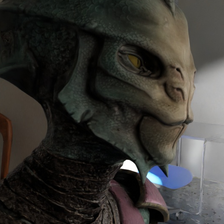
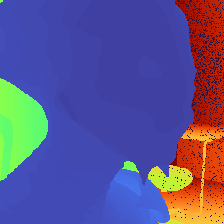

In [4]:
show_one_sample(dataset)

In [5]:
show_viz(dataset)

,

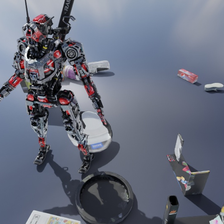
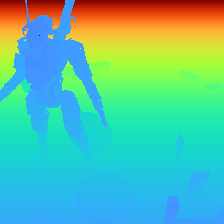

,

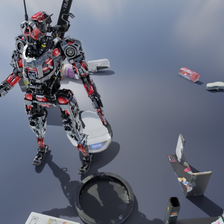
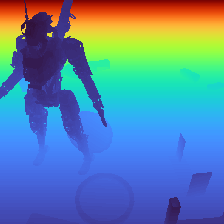

[2025-02-13T23:11:50Z INFO  re_sdk_comms::server] Hosting a SDK server over TCP at 0.0.0.0:9876. Connect with the Rerun logging SDK.
[2025-02-13T23:11:50Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:59614
[2025-02-13T23:11:50Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-02-13T23:11:50Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:59616


In [6]:
show_3d_viz(dataset)

In [7]:
use_augs = False
S = 2
strides = [1,2,3,4,5,6,7,8,9]
clip_step = 2
quick = False  # Set to True for quick testing

dataset = TarTanAirDUSt3R(
    dset='Easy',
    use_augs=use_augs,
    S=S,
    strides=strides,
    clip_step=clip_step,
    quick=quick,
    verbose=False,
    resolution=(512,384), 
    dist_type='linear_9_1',
    aug_crop=16)

idxs = np.arange(0, len(dataset) - 1, (len(dataset) - 1) // 10)

print(dataset[idxs[0]][0].keys())
print(f"len: {len(dataset[idxs[0]])}")
for k, v in dataset[idxs[0]][0].items():
    if isinstance(v, np.ndarray):
        print(f"{k}:", dataset[idxs[0]][0][k].shape)
    elif isinstance(v, torch.Tensor):
        print(f"{k}:", dataset[idxs[0]][0][k].size())
    else:
        print(f"{k}:", dataset[idxs[0]][0][k])

print(f"data['img']: {dataset[0][0]['img']}")
print(f"data['depthmap']: {dataset[0][0]['depthmap']}")
print(f"data['pts3d']: {dataset[0][0]['pts3d']}")

loading tartanair dataset...
data/tartanair/*/Easy/*/
['data/tartanair/test/Easy/P001/']
found 1 unique videos in data/tartanair (dset=Easy)
seq data/tartanair/test/Easy/P001/
stride counts: {1: 217, 2: 216, 3: 215, 4: 214, 5: 213, 6: 212, 7: 211, 8: 210, 9: 209}
resampled_num_clips_each_stride: [217, 192, 168, 144, 120, 96, 72, 48, 24]
collected 1081 clips of length 2 in data/tartanair (dset=Easy)
dict_keys(['img', 'depthmap', 'camera_pose', 'camera_intrinsics', 'dataset', 'label', 'instance', 'idx', 'true_shape', 'z_far', 'pts3d', 'valid_mask', 'rng'])
len: 2
img: torch.Size([3, 384, 512])
depthmap: (384, 512)
camera_pose: (4, 4)
camera_intrinsics: (3, 3)
dataset: tartanair
label: test-P001
instance: 000412_left.png
idx: (np.int64(0), 0, 0)
true_shape: (2,)
z_far: 0
pts3d: (384, 512, 3)
valid_mask: (384, 512)
rng: 2127672332
data['img']: tensor([[[-1.0000, -1.0000, -1.0000,  ...,  0.5373,  0.5216,  0.4980],
         [-1.0000, -1.0000, -1.0000,  ...,  0.5529,  0.5216,  0.5137],
      

,

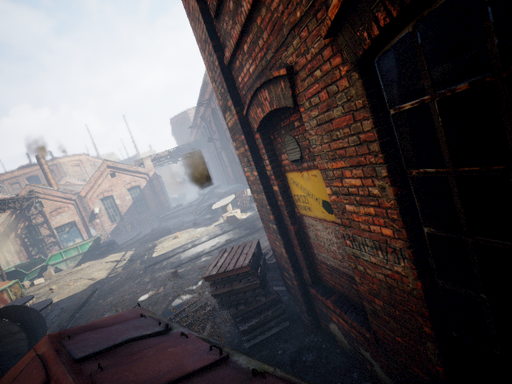
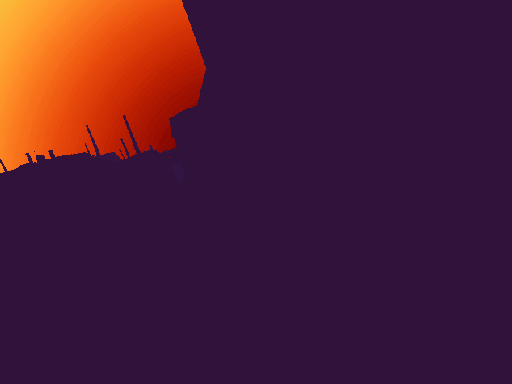

In [8]:
show_one_sample(dataset)

In [9]:
show_viz(dataset)

,

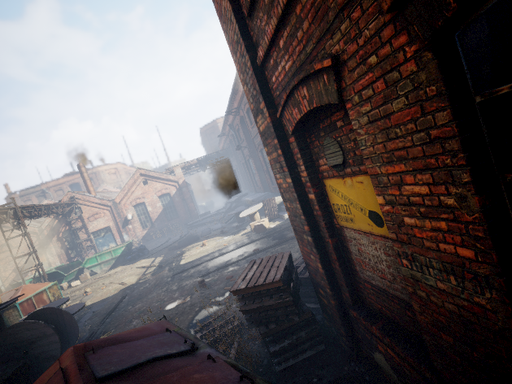
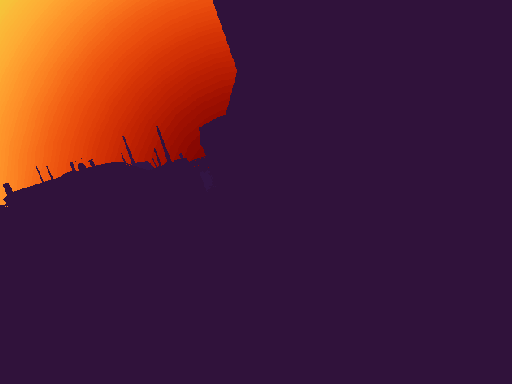

,

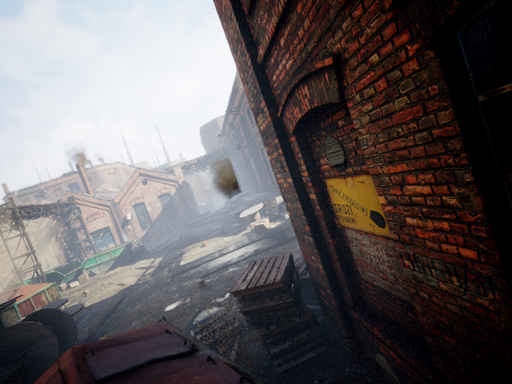
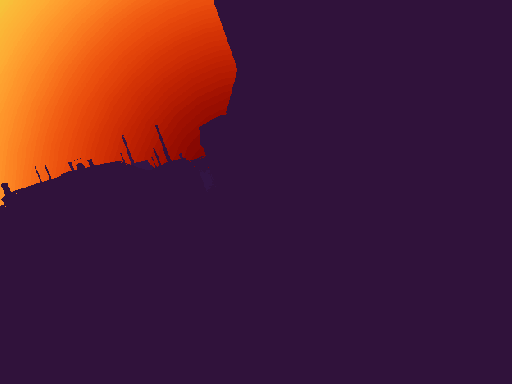

[2025-02-13T23:11:54Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-02-13T23:11:54Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:59625
[2025-02-13T23:11:54Z INFO  re_sdk::spawn] A process is already listening at this address. Assuming it's a Rerun Viewer. addr=0.0.0.0:9876
[2025-02-13T23:11:54Z INFO  re_sdk_comms::server] New SDK client connected from: 127.0.0.1:59628


: 

In [ ]:
show_3d_viz(dataset)